In [1]:
import time
import requests
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd


from selenium import webdriver
from matplotlib import rc
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [2]:
options = webdriver.ChromeOptions()
options.add_experimental_option("excludeSwitches", ["enable-logging"])
wd = webdriver.Chrome('./chromedriver.exe',options=options)

C:\Users\admin\AppData\Local\Temp\ipykernel_8376\2025538577.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome('./chromedriver.exe',options=options)


In [3]:
star_url = 'https://www.starbucks.co.kr/store/store_map.do'
wd.get(star_url)

In [4]:
# selenium 4 버전으로 변경되면서 함수 원형이 수정됨. 4버전에서 xpath 쓰기 위해 새 패키지 추가하고 수정해서 써야함
# 새 패키지 추가
from selenium.webdriver.common.by import By

In [5]:
# find_element_by_xpath는 selenium 3 버전에서만 쓸 수 있음. 우리는 4버전으로 업데이트해서 아래 구문을 쓰면 에러뜸
# wd.find_element_by_xpath('//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()

# 4버전 구문
wd.find_element(By.XPATH, '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click() # 매장찾기 클릭해라
time.sleep(2)
wd.find_element(By.XPATH, '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/article[2]/div[1]/div[2]/ul/li[1]/a').click() # '서울'을 클릭해라
time.sleep(2)
wd.find_element(By.XPATH, '//*[@id="mCSB_2_container"]/ul/li[1]/a').click() # '서울 전체'를 클릭해라


In [6]:
req = wd.page_source
soup = BeautifulSoup(req, "html.parser")
info = soup.find("div", id = "mCSB_3_container").find_all("li", class_ = 'quickResultLstCon')
len(info), info[0]

(588,
 <li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>)

In [7]:
name = info[0].find("strong").text.strip()
address = info[0].find(class_="result_details").text.strip()[:-9]
place = address.split(" ")[1]

name, address, place

('역삼아레나빌딩', '서울특별시 강남구 언주로 425 (역삼동)', '강남구')

In [8]:
star_info = []
for item in info :
    name = item.find("strong").text.strip()
    address = item.find(class_="result_details").text.strip()[:-9]
    place = address.split(" ")[1]
   
    data = {
        "가게명" : name,
        "주소" : address,
        "구" : place
    }
    star_info.append(data)
len(star_info)

588

In [9]:
df_star = pd.DataFrame(star_info, columns = ['가게명', '구', '주소'])
df_star.tail()

,가게명,구,주소
583,중랑구청,중랑구,서울특별시 중랑구 신내로 72
584,사가정역,중랑구,서울특별시 중랑구 면목로 310
585,상봉역,중랑구,서울특별시 중랑구 망우로 307 (상봉동)
586,묵동,중랑구,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층"
587,중화역,중랑구,서울특별시 중랑구 봉화산로 35


In [10]:
gu_list = list(set(df_star["구"]))
gu_list

['관악구',
 '은평구',
 '동작구',
 '구로구',
 '송파구',
 '노원구',
 '성동구',
 '금천구',
 '중구',
 '중랑구',
 '강동구',
 '강남구',
 '도봉구',
 '종로구',
 '서초구',
 '영등포구',
 '강서구',
 '양천구',
 '서대문구',
 '성북구',
 '마포구',
 '용산구',
 '동대문구',
 '강북구',
 '광진구']

In [11]:
edi_url = "https://www.ediya.com/contents/find_store.html"
wd = webdriver.Chrome("./chromedriver.exe",options=options)
wd.get(edi_url)

C:\Users\admin\AppData\Local\Temp\ipykernel_8376\1272565966.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome("./chromedriver.exe",options=options)


In [12]:
edi_info = []



for gu in gu_list:
    wd.find_element(By.XPATH, '//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a').click()
    wd.find_element(By.XPATH, '//*[@id="keyword"]').clear
    wd.find_element(By.XPATH, '//*[@id="keyword"]').send_keys("서울 " + gu)
    wd.find_element(By.XPATH, '//*[@id="keyword_div"]/form/button').click()
    
    html = wd.page_source
    soup = BeautifulSoup(html, "html.parser")
    
    info = soup.find("ul", id = "placesList").find_all("li", class_='item')
    
    for item in info:
        name = item.find("dt").text
        address = item.find("dd").text.strip()
        place = address.split(" ")[1]
        

        data = {
            "가게명" : name,
            "구" : place,
            "주소" : address,
        }
        edi_info.append(data)
 
len(edi_info)

689

In [13]:
df_edi = pd.DataFrame(edi_info)
df_edi.tail()

,가게명,구,주소
684,수유1동점,강북구,서울 강북구 삼양로 293 (수유동)
685,수유사거리점,강북구,"서울 강북구 덕릉로 82 (수유동, 제네스타워)"
686,수유역점,강북구,서울 강북구 도봉로 355 (수유동)
687,우이역도선사점,강북구,서울 강북구 삼양로173길 21 (우이동)
688,한신대점,강북구,서울 강북구 덕릉로 31 (수유동)


In [14]:
star_count = []
for item in gu_list:
    n = len(df_star.loc[df_star['구']==item])
    data = {
        "구" : item,
        "스벅 매장수" : n
    }
    star_count.append(data)
df_star_count = pd.DataFrame(star_count)
df_star_count

,구,스벅 매장수
0,관악구,12
1,은평구,10
2,동작구,11
3,구로구,12
4,송파구,34
5,노원구,13
6,성동구,13
7,금천구,13
8,중구,53
9,중랑구,7


In [15]:
edi_count = []
for item in gu_list:
    n = len(df_edi.loc[df_edi['구']==item])
    data = {
        "구" : item,
        "이디야 매장수" : n
    }
    edi_count.append(data)
df_edi_count = pd.DataFrame(edi_count)
df_edi_count

,구,이디야 매장수
0,관악구,28
1,은평구,27
2,동작구,44
3,구로구,0
4,송파구,39
5,노원구,31
6,성동구,23
7,금천구,23
8,중구,29
9,중랑구,27


In [19]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['DejaVu Sans',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'DejaVu Sans',
 'STIXSizeTwoSym',
 'STIXGeneral',
 'STIXSizeOneSym',
 'STIXSizeFourSym',
 'DejaVu Sans',
 'DejaVu Serif Display',
 'cmmi10',
 'DejaVu Serif',
 'cmsy10',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'cmss10',
 'cmtt10',
 'STIXSizeFiveSym',
 'cmb10',
 'STIXNonUnicode',
 'DejaVu Sans',
 'STIXGeneral',
 'cmr10',
 'STIXSizeTwoSym',
 'cmex10',
 'STIXSizeThreeSym',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'STIXSizeOneSym',
 'STIXGeneral',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'DejaVu Sans Display',
 'STIXSizeFourSym',
 'Castellar',
 'Gill Sans MT',
 'Cambria',
 'NanumSquare_ac',
 'Courier New',
 'Mistral',
 'Segoe UI',
 'Chiller',
 'Gadugi',
 'Lucida Sans Typewriter',
 'Bell MT',
 'Malgun Gothic',
 'Bodoni MT',
 'Segoe Print',
 'French Script MT',
 'Tw Cen MT Condensed Extra Bold',
 'Trebuchet MS',
 'Gill Sans MT',
 'Ink Free',
 'Book Antiqua',
 'Gill Sa

In [17]:
sum_data = pd.merge(df_edi_count, df_star_count)
sum_data["매장 수 차이"] = sum_data["이디야 매장수"] - sum_data["스벅 매장수"]
sum_data

,구,이디야 매장수,스벅 매장수,매장 수 차이
0,관악구,28,12,16
1,은평구,27,10,17
2,동작구,44,11,33
3,구로구,0,12,-12
4,송파구,39,34,5
5,노원구,31,13,18
6,성동구,23,13,10
7,금천구,23,13,10
8,중구,29,53,-24
9,중랑구,27,7,20


In [23]:
# 음수 마이너스 표시가 깨져서 나올 때 처리하는 공식
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False

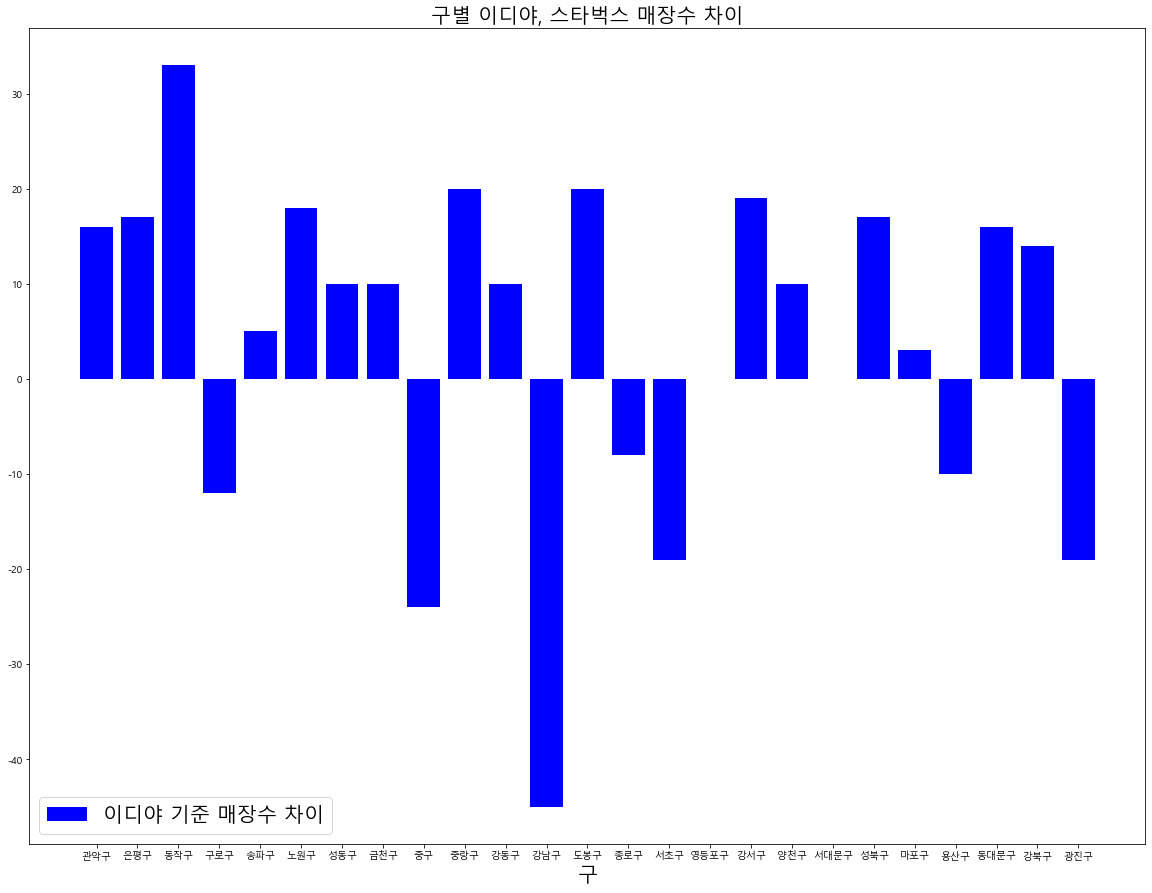

In [24]:
a = sum_data["매장 수 차이"]
y = "ediya"

plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 깨진거 해결하는 코드
plt.figure(figsize=(20,15))
plt.bar(sum_data["구"], a, color = 'b', label ="이디야 기준 매장수 차이" )
plt.title("구별 이디야, 스타벅스 매장수 차이", fontsize = 20)
plt.xlabel("구", fontsize = 20)
plt.legend(loc ='lower left', fontsize = 20)
plt.show()